# WeatherPy
----


In [1]:
%matplotlib notebook

In [111]:
# Dependencies and Setup, including import os for path to write to csv
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key for OpenWeatherMap
from config import weather_api_key

# Incorporate citipy to determine city from latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_file = os.path.join("..", "output_data", "cities.csv")

# Range of latitudes and longitudes (all possible for use with np.random)
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations to use to find nearest city with citipy
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (> 500 cities)
print(len(cities))

596


In [5]:
# View the lengthy list of cities created from the random coordinates
cities

['ribeira grande',
 'kharp',
 'sinnamary',
 'komsomolskiy',
 'brest',
 'barinas',
 'roald',
 'albany',
 'acapulco',
 'kapaa',
 'mar del plata',
 'el badari',
 'lebu',
 'belushya guba',
 'busselton',
 'castro',
 'nikolskoye',
 'new norfolk',
 'saldanha',
 'punta arenas',
 'yellowknife',
 'cherskiy',
 'airai',
 'rikitea',
 'georgetown',
 'hobart',
 'ostrovnoy',
 'sao gabriel da cachoeira',
 'hilo',
 'palmer',
 'upernavik',
 'wahran',
 'seminole',
 'bonthe',
 'almaznyy',
 'maldonado',
 'douentza',
 'kodiak',
 'san quintin',
 'jamestown',
 'nanchang',
 'baykit',
 'necochea',
 'bredasdorp',
 'polunochnoye',
 'ler',
 'pangnirtung',
 'vlore',
 'richards bay',
 'severo-kurilsk',
 'predeal',
 'nanortalik',
 'ushuaia',
 'erenhot',
 'karratha',
 'grand-lahou',
 'santa maria',
 'emerald',
 'cap malheureux',
 'tumannyy',
 'saskylakh',
 'attawapiskat',
 'arica',
 'illoqqortoormiut',
 'leshukonskoye',
 'puerto ayora',
 'carlagan',
 'deputatskiy',
 'kasongo-lunda',
 'gladstone',
 'chokurdakh',
 'tukto

## Perform API Calls
* Perform a weather check on the cities list (using a series of API calls) and include a print log to record each city as it's processed with city number and name

In [6]:
# limit on how much can request a minute and 1M calls a month so break this up into groups of about 50 like the example
# From Grading rubric "Loops over a static range rather than the length of the cities list" seems to be bad? 
# Try breaking apart the cities list into pieces using len and the index values for each city?

# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL, and choose imperial for Fahrenheit
query_url = f'{base_url}appid={weather_api_key}&units=imperial&q='

# Goal data frame City Lat Lng MaxTemp Humidity Cloudiness Wind Speed Country Date

#lat = []
#lng = []
#temp = [] # not needed actually in data frame
#max_temp = []
#humidity = []
#cloudiness = [] 
#wind_speed = []
#country = []
#date = []

#for city in cities_listA:
    #response = requests.get(query_url + city).json()
    #need to add all the other stuff I need to collect for the data frame
    #lat.append(response['coord']['lat'])
    #lng.append(response['coord']['lon'])
    #temp.append(response['main']['temp']) # not needed
    #max_temp.append(response['main']['temp_max'])
    #humidity.append(response['main']['humidity'])
    #cloudiness.append(response['clouds']['all'])
    #wind_speed.append(response['wind']['speed'])
    #country.append(response['sys']['country'])
    #date.append(response['dt'])

# Test these
# print(lat)
# print(lng)
# print(temp)
# print(max_temp)
# print(humidity)
# print(cloudiness)
# print(wind_speed)
# print(country)
# print(date)

# cities_listA = len(cities)
# for i in range(cities_listA):
#    print(cities[i])
    
# May not need to use enumerate() - like: for i,val in enumerate(cities_listA) 
# since can add an index for the pandas dataframe

# desired result is from a try, then except message "City not found. Skipping..." pass

In [8]:
# Request/receive data using API and put in a dictionary to use for a data frame

# Identify start point for the data retrieval
print('Beginning Data Retrieval Process\n\
--------------\n')

# Create a list to store weather info to be requested with the API
weather_details = []

# Identify the variables in a way to divide into smaller sets, and set starting values
record = 0
sets = 1

# Create a for loop to add details about current weather 
for city in cities:
    record += 1
    print(f'Processing Record {record} of Set {sets} | {city}')
    
    # Once a set reaches 50 cities, move to the next set
    if record == 50:
        record = 0
        sets += 1
        
# Within the for loop request info needed from OpenWeatherMap
    response = requests.get(query_url + city).json()
    
    # Include a route out if the city requested is not found
    try:
        # Goal data frame includes City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
        weather_details.append({
            'City': city,
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    except:
        # Identify text to include if the city is not found, and pass to continue the looping
        print('City not found. Skipping...')
        pass

# Add text to show data retrieval has concluded
print(f'--------------\n\
Data Retrieval Complete\n\
--------------')

Beginning Data Retrieval Process
--------------

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | kharp
Processing Record 3 of Set 1 | sinnamary
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | brest
Processing Record 6 of Set 1 | barinas
Processing Record 7 of Set 1 | roald
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | acapulco
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | el badari
City not found. Skipping...
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | xining
Processing Record 36 of Set 4 | auki
Processing Record 37 of Set 4 | grafton
Processing Record 38 of Set 4 | shitanjing
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | galle
Processing Record 41 of Set 4 | mount isa
Processing Record 42 of Set 4 | moletai
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | banjar
Processing Record 47 of Set 4 | khani
Processing Record 48 of Set 4 | amga
Processing Record 49 of Set 4 | dwarka
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | wairoa
Processing Record 2 of Set 5 | tornio
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | codajas
Processing Record 7 of Set 5 | krasnoselkup
Processing Record 8 of Set 5 | 

Processing Record 23 of Set 8 | koundara
Processing Record 24 of Set 8 | arua
Processing Record 25 of Set 8 | kirakira
Processing Record 26 of Set 8 | isangel
Processing Record 27 of Set 8 | kitgum
Processing Record 28 of Set 8 | bima
Processing Record 29 of Set 8 | seymchan
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | hobe sound
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | ono
Processing Record 36 of Set 8 | yongan
Processing Record 37 of Set 8 | astana
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | mahon
Processing Record 40 of Set 8 | phalombe
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | colwyn bay
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | arlit
Processing Record 45 of Set 8 | san carlos de bariloche
Processing Record 46 of Set 8 | imeni poliny osipenko
Processing Recor

Processing Record 8 of Set 12 | cabo san lucas
Processing Record 9 of Set 12 | iberia
Processing Record 10 of Set 12 | shimoda
Processing Record 11 of Set 12 | shirgaon
Processing Record 12 of Set 12 | safaqis
City not found. Skipping...
Processing Record 13 of Set 12 | martinsville
Processing Record 14 of Set 12 | podosinovets
Processing Record 15 of Set 12 | vouliagmeni
Processing Record 16 of Set 12 | mamu kanjan
Processing Record 17 of Set 12 | cordoba
Processing Record 18 of Set 12 | ciras
City not found. Skipping...
Processing Record 19 of Set 12 | oranjestad
Processing Record 20 of Set 12 | general pico
Processing Record 21 of Set 12 | nortelandia
Processing Record 22 of Set 12 | sampit
Processing Record 23 of Set 12 | port keats
Processing Record 24 of Set 12 | sembakung
Processing Record 25 of Set 12 | geraldton
Processing Record 26 of Set 12 | frontera
Processing Record 27 of Set 12 | sao jose da coroa grande
Processing Record 28 of Set 12 | jumla
Processing Record 29 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a Pandas DataFrame for the information collected
weather_df = pd.DataFrame(weather_details)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,62.60,59,20,34.52,PT,1619189755
1,kharp,66.8014,65.8081,34.77,99,100,1.92,RU,1619189756
2,sinnamary,5.3833,-52.9500,80.78,83,54,13.91,GF,1619189756
3,komsomolskiy,40.4272,71.7189,64.40,32,3,2.30,UZ,1619189756
4,brest,52.1000,23.7000,44.13,61,98,14.97,BY,1619189757
...,...,...,...,...,...,...,...,...,...
535,iralaya,15.0000,-83.2333,84.20,74,40,12.24,HN,1619189916
536,urumqi,43.8010,87.6005,39.20,56,75,11.18,CN,1619189647
537,mitsamiouli,-11.3847,43.2844,81.43,77,54,15.05,KM,1619189917
538,progreso,21.2833,-89.6667,84.00,78,75,12.66,MX,1619189917


In [10]:
# Export weather to a csv file: output_file = os.path.join("..", "output_data", "cities.csv")
weather_df.to_csv(output_file, header=True) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Check out the weather statistics (and check if max humidity > 100)
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,19.802084,16.691143,63.096926,66.742593,51.666667,8.279481,1.619190e+09
std,32.250765,92.725401,21.706355,23.054313,38.641927,5.662924,7.726778e+01
min,-54.800000,-179.166700,-12.820000,4.000000,0.000000,0.430000,1.619189e+09
25%,-6.595300,-67.391900,48.990000,55.750000,15.500000,4.180000,1.619190e+09
50%,22.728800,24.420700,68.000000,71.000000,44.500000,6.960000,1.619190e+09
75%,44.391900,100.364475,80.280000,84.000000,90.000000,11.500000,1.619190e+09
max,78.218600,178.416700,107.780000,100.000000,100.000000,35.900000,1.619190e+09


In [14]:
# Above looks like no humidity is > 100 but will locate any >= to 100 to take a look
locations_high_humidity = weather_df.loc[weather_df['Humidity'] >= 100]
locations_high_humidity

# Confirmed understanding of .describe() humidity column max, no humidity>100 errors exist in data
# weather_df is clean data for use in plotting

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
88,vaini,-21.2000,-175.2000,73.40,100,20,1.14,TO,1619189782
164,tiksi,71.6872,128.8694,0.61,100,46,5.57,RU,1619189805
182,tornio,65.8481,24.1466,32.00,100,90,13.80,FI,1619189811
192,mount gambier,-37.8333,140.7667,51.80,100,90,8.05,AU,1619189813
238,colares,38.7992,-9.4469,60.01,100,75,11.50,PT,1619189827
258,fortuna,40.5982,-124.1573,51.01,100,1,6.91,US,1619189833
268,port-cartier,50.0334,-66.8654,37.99,100,75,6.91,CA,1619189836
304,pierre,44.3683,-100.3510,33.80,100,90,12.66,US,1619189847
445,alofi,-19.0595,-169.9187,71.60,100,9,1.14,NU,1619189890
490,petropavlovsk-kamchatskiy,53.0452,158.6483,33.80,100,98,4.47,RU,1619189903


In [ ]:
# Use time to convert dat column to mm-dd-yyyy only for a new column Date (common)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [93]:
# Considered standardizing the x-axis for latitude plotting (min lat ≈ -55, max ≈ 79)
# Begin the plot for Latitude vs Temperature
# lat_x_axis = np.arange(-60, 100, 20)
# lat_x_axis

# x_values = lat_x_axis
# max temp about 108

In [94]:
# define a function that will allow simpler plotting
def show_plot(x_col, y_col):
    x_values = weather_df.iloc[:,x_col]
    y_values = weather_df.iloc[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    plt.show()

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


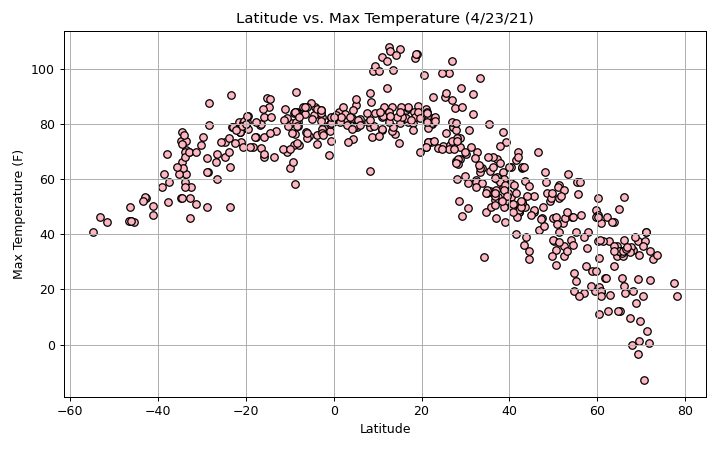

In [95]:
# Plot latitude vs max_temp
figure1 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Max Temperature (4/23/21)'
x_label_name = 'Latitude'
y_label_name = 'Max Temperature (F)'
face = 'lightpink'
edge= 'black'

fig1 = show_plot(1, 3)
plt.tight_layout()


In [115]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_max_temp_image_path = os.path.join('..', 'output_data', 'LatitudeVsMaxTemp.png')
plt.savefig(latitude_vs_max_temp_image_path)

plt.show()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


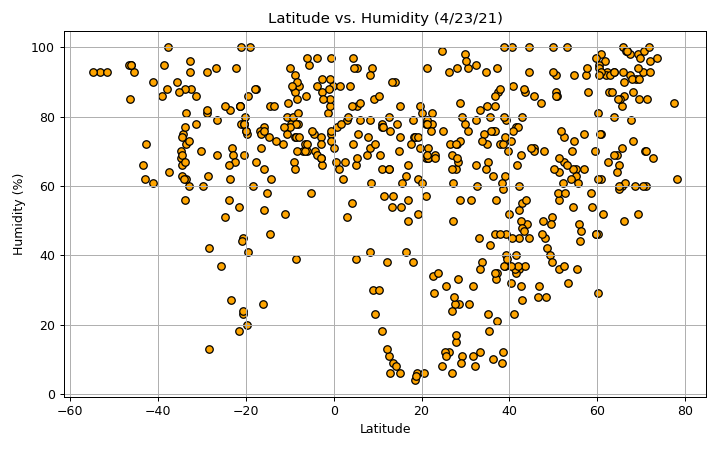

In [117]:
# Plot latitude vs humidity
figure2 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Humidity (4/23/21)'
x_label_name = 'Latitude'
y_label_name = 'Humidity (%)'
face = 'orange'
edge= 'black'

fig2 = show_plot(1, 4)
plt.tight_layout()

In [118]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_humidity_image_path = os.path.join('..', 'output_data', 'LatitudeVsHumidity.png')
plt.savefig(latitude_vs_humidity_image_path)

plt.show()

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


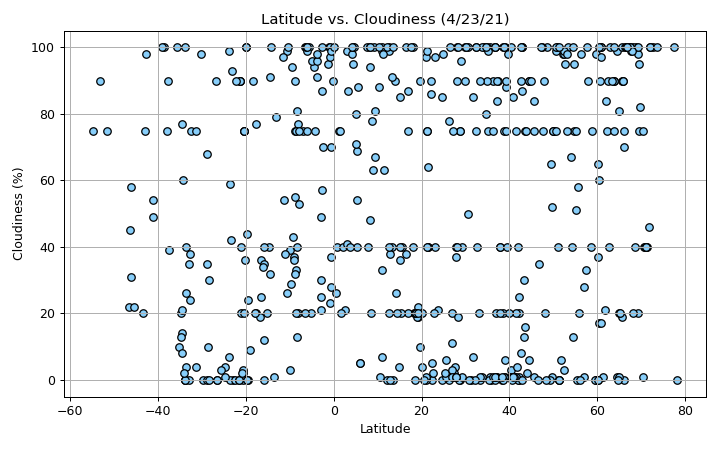

In [92]:
# Plot latitude vs humidity
figure3 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Cloudiness (4/23/21)'
x_label_name = 'Latitude'
y_label_name = 'Cloudiness (%)'
face = 'lightskyblue'
edge= 'black'

fig2 = show_plot(1, 5)
plt.tight_layout()

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


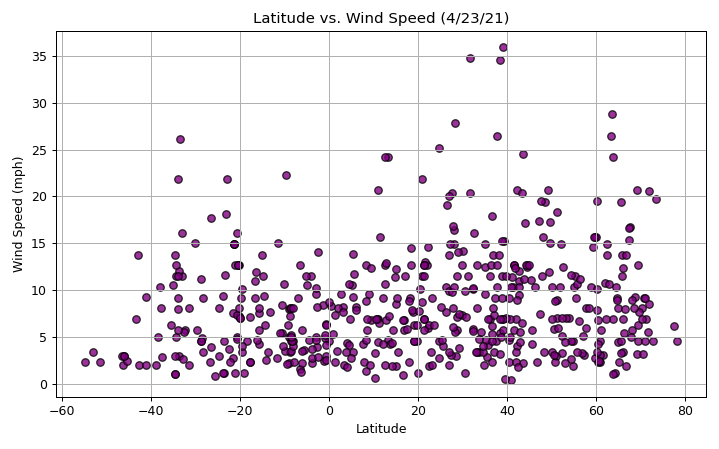

In [87]:
# Plot latitude vs humidity
figure4 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Wind Speed (4/23/21)'
x_label_name = 'Latitude'
y_label_name = 'Wind Speed (mph)'
face = 'purple'
edge= 'black'

fig2 = show_plot(1, 6)
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Save the plots to png files in same place as cities.csv
# output_file = os.path.join("..", "output_data", "cities.csv")

#plt.savefig("../Images/IceCreamSales.png")
#plt.show()